In [67]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
pd.set_option('display.max_rows', None)

In [24]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Nicole')

In [25]:
df = pd.read_csv('EFI_and_GGEI_scores.csv')

In [26]:
df = df[['country', 'economic_freedom_score', 'ggei_score']]

In [27]:
df.head()

,country,economic_freedom_score,ggei_score
0,Switzerland,81.7,75.94
1,Sweden,76.3,76.08
2,Singapore,88.8,61.54
3,Iceland,77.0,71.29
4,Norway,74.3,70.31


In [28]:
X = df.iloc[:, [1, 2]].values

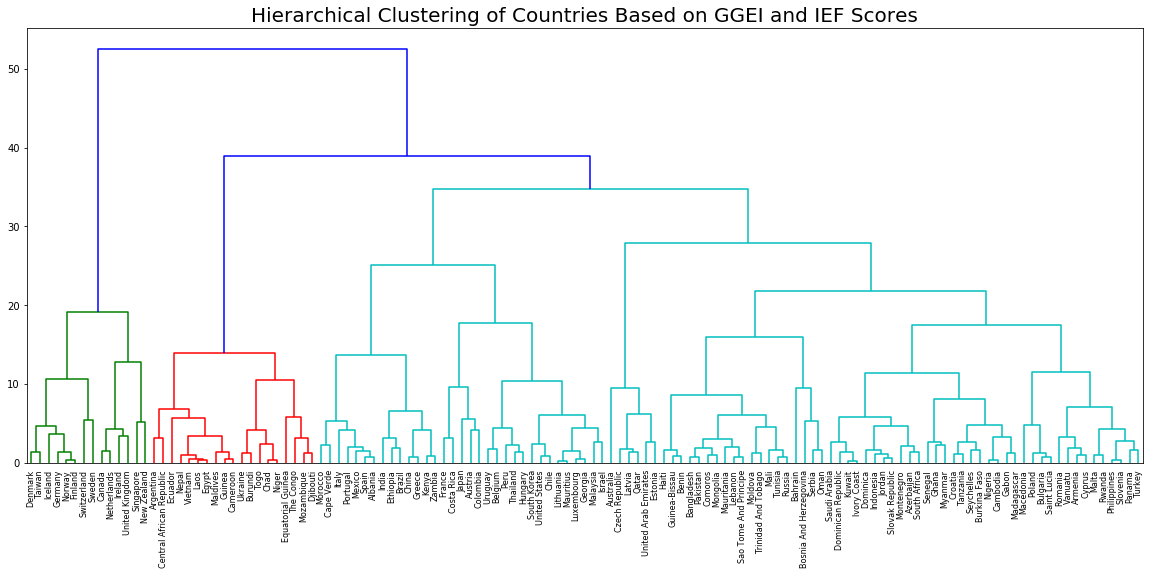

In [76]:
# Calculate the linkage: mergings
mergings = linkage(X, method = 'complete')
country_names = list(df['country'])

# Plot the dendrogram, using varieties as labels
plt.figure(figsize = (20, 8))
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size = 8)
plt.title('Hierarchical Clustering of Countries Based on GGEI and IEF Scores', fontsize = 20);

In [77]:
#get cluster labels based on height of dendrogram, we want four clusters, so we will go with 30 height on the y axis (you can see how the data is split
# into 4 clusters at that height)
labels = fcluster(mergings, 35, criterion = 'distance')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Final Cluster Labels

In [78]:
#inspect the countries and their corresponding cluster labels in a dataframe
pairs = pd.DataFrame({'labels':labels, 'countries':country_names})
pairs = pairs.sort_values('labels').reset_index(drop = True)

pairs

#crosstab is useful for less cardinality in labeling
#pd.crosstab(pairs.iloc[:,1], pairs.iloc[:,0])

,labels,countries
0,1,Switzerland
1,1,Netherlands
2,1,Canada
3,1,United Kingdom
4,1,Germany
5,1,Taiwan
6,1,New Zealand
7,1,Ireland
8,1,Denmark
9,1,Norway


## What about different linkages?
- __Here I am going to use 'single' linkage instead of 'complete'__
    - In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters       is the distance between the closest points of the clusters.


- __You can see how drastically the clustering changed based on the linkage, clustering really is an art!__

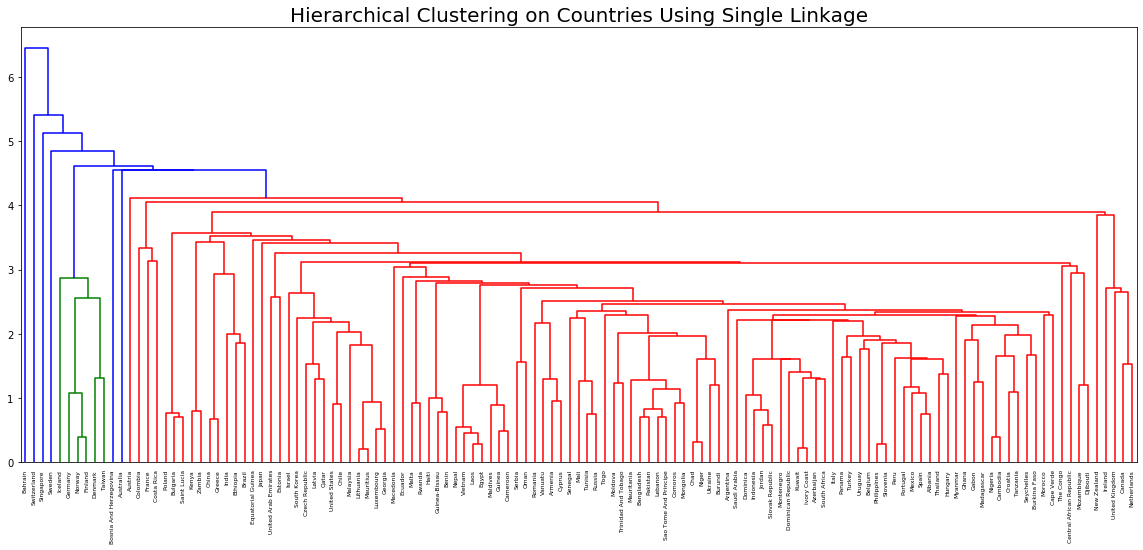

In [57]:
# Calculate the linkage: mergings
mergings = linkage(X, method = 'single')

# Plot the dendrogram
plt.figure(figsize = (20, 8))
dendrogram(mergings, labels=country_names, leaf_rotation = 90, leaf_font_size=6)
plt.title('Hierarchical Clustering on Countries Using Single Linkage', fontsize = 20);

## Using 'ward' linkage

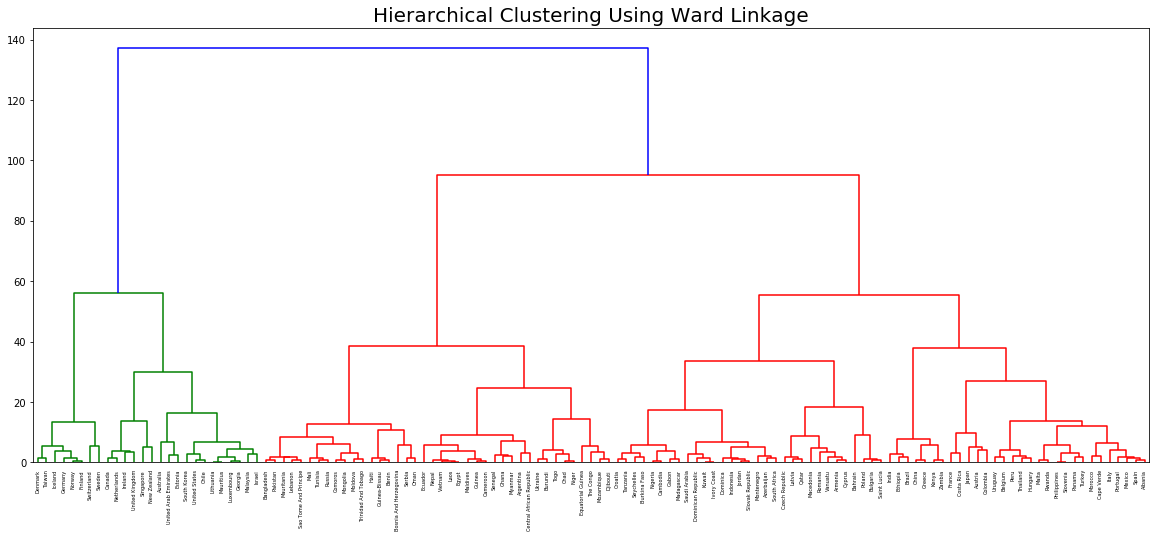

In [59]:
plt.figure(figsize = (20, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), labels = country_names)
plt.title('Hierarchical Clustering Using Ward Linkage', fontsize= 20);

## Using T-SNE (t - distributed stochastic neighbor embedding) to Visualize Clusters
- __Axes have no interpretable meaning, they can be different every time__

- __If you run this code multiple times you will get different visualizations every time, but clusters will still be relative to each other__

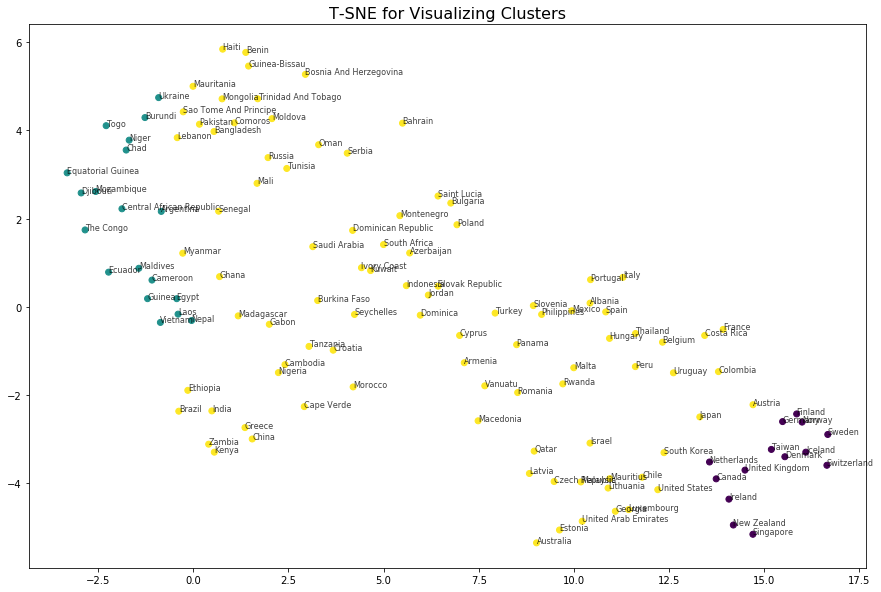

In [94]:
#instantiate T-SNE, learning_rate may need to be tweaked to get the visual right
model = TSNE(learning_rate=50)

#transform the data, T-SNE only has a fit_transform method! So, you cannot extend a T-SNE map to include new samples
transformed = model.fit_transform(X)

#define the axes
xs = transformed[:,0]
ys = transformed[:,1]

#plot
plt.figure(figsize = (15, 10))
plt.scatter(xs, ys, c = labels) #here you would use whatever labels correspond to your groups, since we are using countries, there would be too many colors,
                                    #thus I am going to use their previous labels that we found to visualize them
plt.title('T-SNE for Visualizing Clusters', fontsize = 16)

#if you wanted to annotate the points
for x, y, country in zip(xs, ys, country_names):
    plt.annotate(country, (x, y), fontsize=8, alpha=0.75)
    
plt.show()

## Clustering with KMeans
- __Using inertia ('elbow') graph to see optimal cluster orientation__

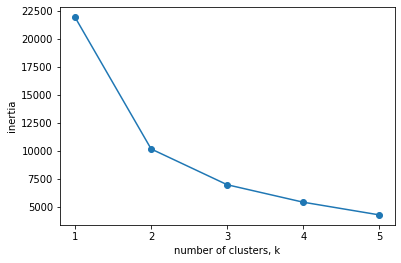

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

model = KMeans(n_clusters = 3)
model.fit(X)
model.predict(X)